# Bayes Titanic

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
import os

In [2]:
os.chdir("C:\\Users\\dsbolanos\\OneDrive - Universidad Rafael Landivar\\Cursos URL\\Analisis de Datos Virtual\\12")
os.getcwd()

'C:\\Users\\dsbolanos\\OneDrive - Universidad Rafael Landivar\\Cursos URL\\Analisis de Datos Virtual\\12'

In [3]:
dataset = pd.read_csv('TitanicData.csv', delimiter=",")
dataset.head(10)

,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0
5,2nd,Female,Child,No,0
6,3rd,Female,Child,No,17
7,Crew,Female,Child,No,0
8,1st,Male,Adult,No,118
9,2nd,Male,Adult,No,154


In [4]:
#Multiplicar el dada frame por la columna Freq y luego eliminarla
TitanicDataframe=dataset.loc[dataset.index.repeat(dataset.Freq)]
TitanicDataframe.drop('Freq',axis=1,inplace=True)
TitanicDataframe.head(100)

,Class,Sex,Age,Survived
2,3rd,Male,Child,No
2,3rd,Male,Child,No
2,3rd,Male,Child,No
2,3rd,Male,Child,No
2,3rd,Male,Child,No
...,...,...,...,...
8,1st,Male,Adult,No
8,1st,Male,Adult,No
8,1st,Male,Adult,No
8,1st,Male,Adult,No


In [5]:
#Almacenar las variables X y Y por separado
X = TitanicDataframe.iloc[:, 0:3].values
y = TitanicDataframe.iloc[:, -1].values
X

array([['3rd', 'Male', 'Child'],
       ['3rd', 'Male', 'Child'],
       ['3rd', 'Male', 'Child'],
       ...,
       ['Crew', 'Female', 'Adult'],
       ['Crew', 'Female', 'Adult'],
       ['Crew', 'Female', 'Adult']], dtype=object)

In [6]:
#Con Enconder podremos codificar atributos no numericos segun una escala

le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X[:,1] = le.fit_transform(X[:,1])
X[:,2] = le.fit_transform(X[:,2])
X

array([[2, 1, 1],
       [2, 1, 1],
       [2, 1, 1],
       ...,
       [3, 0, 0],
       [3, 0, 0],
       [3, 0, 0]], dtype=object)

In [7]:
#Uscamos scikit learn para llamar a la funcion split dividiendo 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [8]:
#creamos el modelo de NB
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
#Predecimos la variable dependiente usando las variables indepndientes del 20%
y_pred  =  classifier.predict(X_test)
y_pred

array(['Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'N

In [10]:
#Vemos los valores reales de Y en el 20%
y_test

array(['No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 

In [11]:
#generamos matriz de confusion y precision
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [12]:
#Confusion matrix
cm

array([[272,  36],
       [ 63,  70]], dtype=int64)

In [13]:
#Accuracy
ac

0.7755102040816326

# Bayes COVID

In [14]:
DataFrameCovid = pd.read_csv("201031COVID19MEXICO.csv",delimiter=",",encoding = "ISO-8859-1")
DataFrameCovid

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-10-31,043f64,2,4,9,2,9,9,10,2,...,1,2,99,1,1,3,99,MÃ©xico,97,1
1,2020-10-31,0e07d8,1,4,15,2,15,15,104,2,...,2,2,99,1,1,3,99,MÃ©xico,97,2
2,2020-10-31,13757c,1,12,15,1,15,15,106,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
3,2020-10-31,002371,1,4,3,2,3,3,8,1,...,2,2,99,1,1,3,99,MÃ©xico,97,97
4,2020-10-31,11fb00,1,12,9,2,9,9,15,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403494,2020-10-31,23973e,1,4,5,1,5,5,35,2,...,2,2,2,1,3,6,99,MÃ©xico,97,2
2403495,2020-10-31,2f534d,1,12,19,2,99,19,44,1,...,2,2,1,1,3,6,2,Estados Unidos de AmÃ©rica,97,97
2403496,2020-10-31,3f4feb,2,4,19,1,19,19,26,2,...,2,2,2,1,3,6,99,MÃ©xico,97,2
2403497,2020-10-31,362e6c,2,4,15,1,15,15,53,2,...,2,2,2,1,3,6,99,MÃ©xico,97,2


In [15]:
DataFrameCovid.FECHA_DEF.max()

'9999-99-99'

In [16]:
DataFrameCovid['Fallecio']= np.where(DataFrameCovid['FECHA_DEF'] == '9999-99-99', False,True)
DataFrameCovid[['FECHA_DEF','Fallecio']]

,FECHA_DEF,Fallecio
0,2020-03-30,True
1,2020-04-02,True
2,9999-99-99,False
3,9999-99-99,False
4,2020-04-05,True
...,...,...
2403494,2020-10-29,True
2403495,9999-99-99,False
2403496,9999-99-99,False
2403497,9999-99-99,False


In [17]:
#Almacenar las variables X y Y por separado
X = DataFrameCovid.loc[:, ['EDAD','SEXO','DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO']].values
y = DataFrameCovid.iloc[:, -1].values
X

array([[58,  2,  1, ...,  2,  1,  2],
       [49,  2,  2, ...,  2,  2,  2],
       [27,  1,  2, ...,  2,  2,  2],
       ...,
       [67,  1,  2, ...,  2,  2,  2],
       [64,  1,  2, ...,  2,  2,  2],
       [52,  1,  2, ...,  2,  2,  2]], dtype=int64)

In [18]:
#Usamos scikit learn para llamar a la funcion split dividiendo 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.97331411,  1.02652016, -0.03727763, ..., -0.21619299,
        -0.05242004, -0.04229156],
       [-0.50241857, -0.97416499, -0.03727763, ..., -0.02748685,
        -0.05242004, -0.04229156],
       [ 0.08620086,  1.02652016, -0.03727763, ..., -0.02748685,
        -0.05242004, -0.04229156],
       ...,
       [ 0.20392475,  1.02652016, -0.03727763, ..., -0.02748685,
        -0.05242004, -0.04229156],
       [-0.73786634,  1.02652016, -0.03727763, ..., -0.02748685,
        -0.05242004, -0.04229156],
       [ 0.32164863, -0.97416499, -0.03727763, ..., -0.02748685,
        -0.05242004, -0.04229156]])

In [20]:
classifierCOVID = GaussianNB()
classifierCOVID.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
#Predecimos la variable dependiente usando las variables indepndientes del 20%
y_pred  =  classifierCOVID.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [22]:
cmCOVID = confusion_matrix(y_test, y_pred)
acCOVID = accuracy_score(y_test,y_pred)

In [23]:
print(cmCOVID)

[[451430   2911]
 [ 25849    510]]


In [24]:
acCOVID

0.9401705845641772

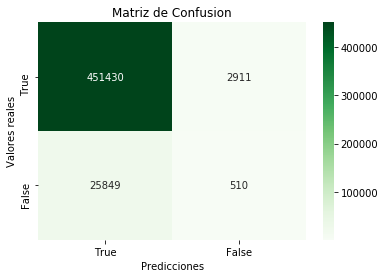

In [25]:
#ploteamos matriz de confusion
import seaborn as sns

ax= plt.subplot()
sns.heatmap(cmCOVID, annot=True, fmt='g', ax=ax,cmap='Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicciones');ax.set_ylabel('Valores reales'); 
ax.set_title('Matriz de Confusion'); 
ax.xaxis.set_ticklabels(['True', 'False']); ax.yaxis.set_ticklabels(['True', 'False']);